In [1]:
import scipy.linalg as la
import os,sys,inspect


%pylab inline

from IPython import display


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:


#Defining time scales
total_time = 100
steps =10000

state_transfer = True
RWA = True
RFT = True

#Defining H0





qubit_state_num = 2

fq= 4.6/(2*np.pi)
kappa = 0.05
gamma = 0.01
#kappa = 0
#gamma = 0
g = 0.05

mode_state_num = 25
#g = 2.*np.pi*0.1 #GHz
fc = 5.0/(2*np.pi) #GHz
state_num = qubit_state_num * mode_state_num
if RFT:
    fq = fq-fc
    fc = 0
    
wc = 2*np.pi*fc
wa = 2*np.pi*fq


alpha = 0.224574
ens = np.array([ 2*np.pi*ii*(fq - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
H0q = np.kron(np.identity(mode_state_num),np.diag(ens))

a   = np.kron(np.diag(np.sqrt(np.arange(1,mode_state_num)),1),np.identity(qubit_state_num))
adag   = np.kron(np.diag(np.sqrt(np.arange(1,mode_state_num)),-1),np.identity(qubit_state_num))
sm = np.kron(np.identity(mode_state_num),np.diag(np.sqrt(np.arange(1,qubit_state_num)),1))
smdag = np.kron(np.identity(mode_state_num),np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))

print a
print sm
if RWA:
     H0 = wc * np.dot(adag,a) + H0q + g * (np.dot(adag,sm) + np.dot(a,smdag))
else:
     H0 = wc * np.dot(adag,a) + H0q +  g * np.dot((adag + a),(sm + smdag))
#Defining Forbidden sates


#Defining Concerned states (starting states)
psi0=[0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2]
states_draw_names = ['g0','e0','g1']



#Defining U (Target)
if state_transfer:
    U =[]
    U1 = np.zeros(state_num,dtype=complex)
    U1[1]=1
    U1[0]=0
    U.append(U1)
    U2 = np.zeros(state_num,dtype=complex)
    U2[0]=1
    U.append(U2)
    
else:
    Ut_c = la.expm((0-1j)*total_time*H0)
    Ct_c = Ut_c.copy()
    Ct_c[1,0] = 1
    Ct_c[0,1] = 1
    Ct_c[0,0] = 0
    Ct_c[1,1] = 0
    U = Ct_c

print np.shape(U)
#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
IX = a + adag
IY = (0+1j)* (a-adag)
Hops = [IX]
ops_max_amp = [0.1]
Hnames =['HI']

#Defining convergence parameters
max_iterations = 5000
decay = max_iterations/2
convergence = {'rate':0.005, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-6,'learning_rate_decay':decay}
reg_coeffs = {'envelope' : 0,  'dwdt':0,'d2wdt2':0}
#, 'forbidden':100 , 'states_forbidden_list': [3]
#reg_coeffs = { 'speed_up':100}
#reg_coeffs = {'envelope' : 0,  'dwdt':0,'d2wdt2':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses

print len(U)
print H0
print IX

[[ 0.          0.          1.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          4.89897949]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(2, 50)
2
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.         -0.4         0.05       ...,  0.          0.          0.        ]
 [ 0.          0.05        0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ..., -0.4        

In [3]:

c_ops=[]
c_ops.append(sm)
c_ops.append(a)
#c_ops.append(ef)

#print c_ops
print gamma


0.01


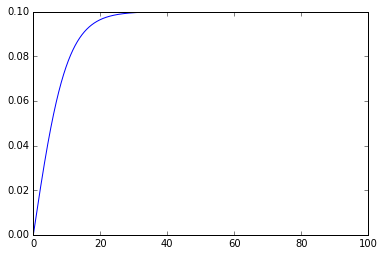

In [4]:
import h5py

with h5py.File('/home/mohamed/Data/00878_Qubit_Pi_open.h5','r') as hf:
    u0 = np.array(hf.get('uks'))[-1]

u0 = None

u0 = []
signal = 0.1*np.tanh(np.linspace(0,total_time, steps)/10)
#signal = 0*np.tanh(np.linspace(0,total_time, steps)/10)

u0.append(signal)
#u0.append(signal)
#u0.append(2*np.ones(steps))

#u0 = None
plot (np.linspace(0,total_time, steps), signal)

In [11]:
#Milstein

state = psi0[0]
initial_vector_c=np.zeros(state_num)
initial_vector_c[state]=1

print initial_vector_c

dt = float(total_time)/steps

print dt
def trajectory(psi):
    def get_D1cop(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = expect * cop - np.dot(cdag,cop) - 0.25*expect*expect
        op = op*rate*0.5
        return op

    def get_drift(step):
        d = H0 
        d = d+ u0[0][step] *Hops[0]
        return d

    def get_D2(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = cop - (0.5 *expect*np.identity(len(cop)))
        op = op*np.sqrt(rate)
        return op

    def normalize(psi):
        norm = np.dot(np.conjugate(np.transpose(psi)),psi)
        return psi/np.sqrt(norm)

    J = []
    cdag = np.conjugate(np.transpose(c_ops[1]))
    expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(c_ops[1] + cdag,psi))
    J.append(expect)
    #print expect
    W1s = []
    W2s = []
    psis = []
    psis.append(psi)
    W2s.append(0)
    for step in range(steps):
        
        drift = get_drift(step)
        D1 = (0-1j)*drift + get_D1cop(c_ops[0],psi,gamma) + get_D1cop(c_ops[1],psi,kappa)
        D1psi = np.dot(D1,psi)
        D21 = get_D2(c_ops[0],psi,gamma)
        D22 = get_D2(c_ops[1],psi,kappa)
        D21psi = np.dot(D21,psi)
        D22psi = np.dot(D22,psi)
        dW1 = np.random.normal() * np.sqrt(dt)
        dW2 = np.random.normal() * np.sqrt(dt)
        W1s.append(dW1)
        W2s.append(dW2)
        
        psiprime = psi + D1psi *dt + D21psi *np.sqrt(dt) + D22psi *np.sqrt(dt)
        
        D21p = get_D2(c_ops[0],psiprime,gamma)
        D22p = get_D2(c_ops[1],psiprime,kappa)
        D21psip = np.dot(D21p,psiprime)
        D22psip = np.dot(D22p,psiprime)
        
        newpsi = psi + D1psi *dt + D21psi *dW1 + D22psi *dW2 + (1/(2*np.sqrt(dt)))*(D21psip-D21psi)*(dW1*dW1-dt) + (1/(2*np.sqrt(dt)))*(D22psip-D22psi)*(dW2*dW2-dt)
        #newpsi = newpsi + 0.5*(dW1*dW1 - dt)*np.dot(np.dot(D21,D21),psi) +  0.5*(dW2*dW2 - dt)*np.dot(np.dot(D22,D22),psi) 
        
        
        psi = normalize(newpsi)
        #print psi
        #print np.dot(np.conjugate(np.transpose(psi)),psi)
        expect_op = c_ops[1] + np.conjugate(np.transpose(c_ops[1]))
        expect_op = np.dot(np.conjugate(np.transpose(c_ops[1])),c_ops[1])
        #cdag = np.conjugate(np.transpose(expect_op))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(expect_op,psi))
        J.append(expect)
        psis.append(psi)
        #print expect
    #print np.max(np.abs(W2s))
    #plot(J)
    return J,W2s,psis

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
0.01


In [5]:
#Euler

state = psi0[0]
initial_vector_c=np.zeros(state_num)
initial_vector_c[state]=1

print initial_vector_c

dt = float(total_time)/steps

print dt
def trajectory(psi):
    def get_D1cop(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = expect * cop - np.dot(cdag,cop) - 0.25*expect*expect*np.identity(len(cop))
        op = op*rate*0.5
        return op

    def get_drift(step):
        d = H0 
        d = d+ u0[0][step] *Hops[0]
        return d

    def get_D2(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = cop - (0.5 *expect*np.identity(len(cop)))
        op = op*np.sqrt(rate)
        return op

    def normalize(psi):
        norm = np.dot(np.conjugate(np.transpose(psi)),psi)
        return psi/np.sqrt(norm)

    J = []
    cdag = np.conjugate(np.transpose(c_ops[1]))
    expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(c_ops[1] + cdag,psi))
    J.append(expect)
    #print expect
    W1s = []
    W2s = []
    psis = []
    psis.append(psi)
    W2s.append(0)
    for step in range(steps):
        
        drift = get_drift(step)
        D1 = (0-1j)*drift + get_D1cop(c_ops[0],psi,gamma) + get_D1cop(c_ops[1],psi,kappa)
        D1psi = np.dot(D1,psi)
        D21 = get_D2(c_ops[0],psi,gamma)
        D22 = get_D2(c_ops[1],psi,kappa)
        D21psi = np.dot(D21,psi)
        D22psi = np.dot(D22,psi)
        dW1 = np.random.normal() * np.sqrt(dt)
        dW2 = np.random.normal() * np.sqrt(dt)
        W1s.append(dW1)
        W2s.append(dW2)
        newpsi = psi + D1psi *dt + D21psi *dW1 + D22psi *dW2
        #newpsi = newpsi + 0.5*(dW1*dW1 - dt)*np.dot(np.dot(D21,D21),psi) +  0.5*(dW2*dW2 - dt)*np.dot(np.dot(D22,D22),psi) 
        
        
        psi = normalize(newpsi)
        #print psi
        #print np.dot(np.conjugate(np.transpose(psi)),psi)
        expect_op = c_ops[1] + np.conjugate(np.transpose(c_ops[1]))
        expect_op = np.dot(np.conjugate(np.transpose(c_ops[0])),c_ops[0])
        #cdag = np.conjugate(np.transpose(expect_op))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(expect_op,psi))
        J.append(expect)
        psis.append(psi)
        #print expect
    #print np.max(np.abs(W2s))
    #plot(J)
    return J,W2s,psis

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.01


0.05 0.01


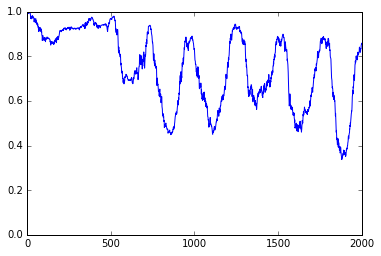

In [8]:
state = psi0[1]
initial_vector_c=np.zeros(state_num)
initial_vector_c[state]=1
Js,Ws,ps = trajectory(initial_vector_c)
#print initial_vector_c
plot (Js)
print kappa,gamma

In [80]:
for ii in range (len(Js)):
    print round(Js[ii],3),round(Ws[ii],3),[round(ps[ii][jj],2) for jj in range (len(ps[ii]))]
    print "----------------------------------------------------"

0.0 0.0 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
----------------------------------------------------
0.0 0.162 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
----------------------------------------------------
0.0 -0.01 [-0.0, 1.0, 0.0, 0.0, -0.0, 0.0]
----------------------------------------------------
0.0 0.115 [0.0, 1.0, 0.0, 0.0, -0.0, 0.0]
----------------------------------------------------
0.0 0.078 [0.0, 1.0, 0.0, 0.0, -0.0, -0.0]
----------------------------------------------------
0.0 0.066 [0.0, 0.99, 0.0, 0.0, -0.0, -0.0]
----------------------------------------------------
0.0 -0.386 [-0.0, 0.99, 0.0, 0.0, -0.0, 0.0]
----------------------------------------------------
0.0 -0.199 [-0.0, 0.99, 0.0, 0.0, -0.0, -0.0]
----------------------------------------------------
0.0 -0.388 [-0.0, 0.99, 0.0, 0.0, -0.0, -0.0]
----------------------------------------------------
0.0 -0.055 [-0.0, 0.98, 0.0, 0.0, -0.0, -0.0]
----------------------------------------------------
0.001 0.053 [-0.0, 0.98, 0.0, 0.0, 

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [6]:
state = psi0[1]
initial_vector_c=np.zeros(state_num)
initial_vector_c[state]=1
ps = []
ws = []
for ii in range(2000):
    _,w,p = trajectory(initial_vector_c)
    ps.append(p)
    ws.append(w)
    if ii%100 ==0:
        print ii
#ps = ps/500
print "Done"
#plot(ps)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
Done


In [ ]:
print np.shape(ps)

e=[]
expect_op = np.dot(np.conjugate(np.transpose(c_ops[1])),c_ops[1])
J = np.array(np.zeros(steps))
for jj in range (len(ps)):
    
    inte = []
    for ii in range (steps):
        
        psm = ps[jj][ii]
        expect = np.dot(np.conjugate(np.transpose(psm)),np.dot(expect_op,psm))
        inte.append(expect)
    J= J+inte
J = J/len(ps)
    
#expect_op = np.dot(np.conjugate(np.transpose(c_ops[1])),c_ops[1])
        #cdag = np.conjugate(np.transpose(expect_op))
#expect = np.dot(np.conjugate(np.transpose(psm)),np.dot(expect_op,psm))
#plot(J)
p1 = np.load("../Examples/photons1.npy")
ts = np.load("../Examples/tlist.npy")
plot(np.linspace(0,total_time, steps),J)
plot(ts,p1)

figure()

e=[]
expect_op = np.dot(np.conjugate(np.transpose(c_ops[0])),c_ops[0])
J = np.array(np.zeros(steps))
for jj in range (len(ps)):
    
    inte = []
    for ii in range (steps):
        
        psm = ps[jj][ii]
        expect = np.dot(np.conjugate(np.transpose(psm)),np.dot(expect_op,psm))
        inte.append(expect)
    J= J+inte
J = J/len(ps)
    
#expect_op = np.dot(np.conjugate(np.transpose(c_ops[1])),c_ops[1])
        #cdag = np.conjugate(np.transpose(expect_op))
#expect = np.dot(np.conjugate(np.transpose(psm)),np.dot(expect_op,psm))
#plot(J)
p1 = np.load("../Examples/qubit1.npy")
ts = np.load("../Examples/tlist.npy")
plot(np.linspace(0,total_time, steps),J)
plot(ts,p1)

figure()

e=[]
expect_op = (np.conjugate(np.transpose(c_ops[1]))+c_ops[1])
J = np.array(np.zeros(steps))
for jj in range (len(ps)):
    
    inte = []
    for ii in range (steps):
        
        psm = ps[jj][ii]
        expect = np.dot(np.conjugate(np.transpose(psm)),np.dot(expect_op,psm))
        inte.append(expect)
    J= J+inte
J = J/len(ps)
    
#expect_op = np.dot(np.conjugate(np.transpose(c_ops[1])),c_ops[1])
        #cdag = np.conjugate(np.transpose(expect_op))
#expect = np.dot(np.conjugate(np.transpose(psm)),np.dot(expect_op,psm))
#plot(J)
p1 = np.load("../Examples/I1.npy")
ts = np.load("../Examples/tlist.npy")
plot(np.linspace(0,total_time, steps),J)
plot(ts,p1)

0
100
200
300
400


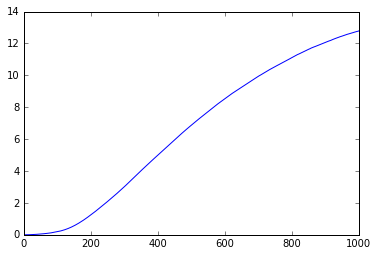

In [61]:
state = psi0[1]
initial_vector_c=np.zeros(state_num)
initial_vector_c[state]=1
J = np.array(np.zeros(steps+1))
for ii in range(500):
    J = J +np.array(trajectory(initial_vector_c)[0])
    if ii%100 ==0:
        print ii
J = J/500

plot(J)

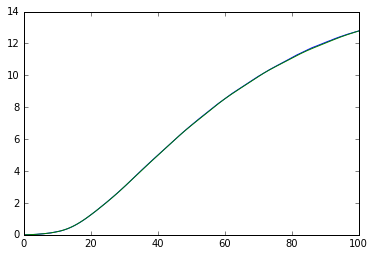

In [62]:
p1 = np.load("../Examples/photons1.npy")
ts = np.load("../Examples/tlist.npy")
plot(np.linspace(0,total_time, steps+1),J)
plot(ts,p1)

0
100
200
300
400


NameError: name 'ts' is not defined

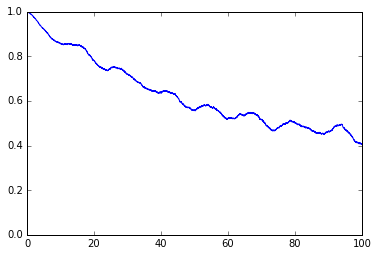

In [9]:
state = psi0[1]
initial_vector_c=np.zeros(state_num)
initial_vector_c[state]=1
#steps = 500
JJ = np.array(np.zeros(steps+1))
original = steps
for ii in range (500):
    steps = original
    u0 = []
    signal = 0.1*np.tanh(np.linspace(0,total_time, steps)/10)
    u0.append(signal)
    
    
    intermediate = np.array(np.zeros(steps+1))
    dt = total_time/float(steps)
    intermediate = np.array(trajectory(initial_vector_c)[0]) +intermediate
    
    steps = original*2
    dt = total_time/float(steps)
    u0 = []
    signal = 0.1*np.tanh(np.linspace(0,total_time, steps)/10)
    u0.append(signal)
    bb = np.array(trajectory(initial_vector_c)[0][::2])
    intermediate =  bb + bb - intermediate
    JJ = JJ + intermediate
    if ii%100 ==0:
        print ii
steps = original
plot (np.linspace(0,total_time, steps+1),JJ/500)
#plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))
plot(ts,p1)

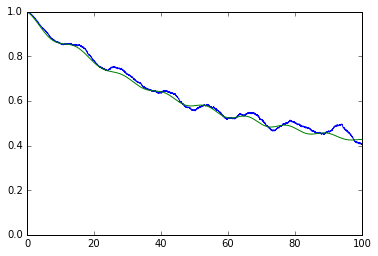

In [10]:
plot (np.linspace(0,total_time, steps+1),JJ/500)
p1 = np.load("../Examples/qubit1.npy")
ts = np.load("../Examples/tlist.npy")
plot(ts,p1)


In [118]:
state = psi0[1]
initial_vector_c=np.zeros(state_num)
initial_vector_c[state]=1
J = np.array(np.zeros(steps+1))
for ii in range(500):
    J = J +np.array(trajectory(initial_vector_c[0]))
    print ii
J = J/500

plot(J)

0
1
2
3
4
5
6
7
8
9


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in divide


KeyboardInterrupt: 

Verifying init vector id: 0
Verifying init vector id: 1
7604.48478893
Verifying init vector id: 0
Verifying init vector id: 1
2411.82922255
Verifying init vector id: 0
Verifying init vector id: 1
14181.1655411


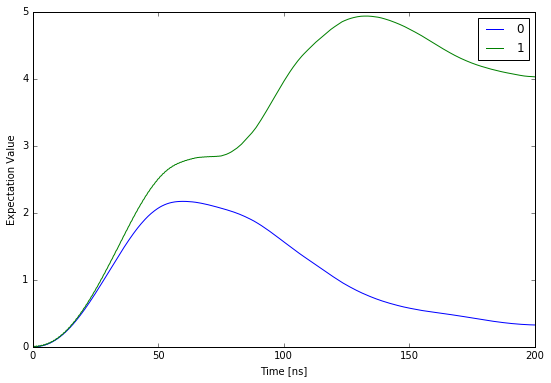

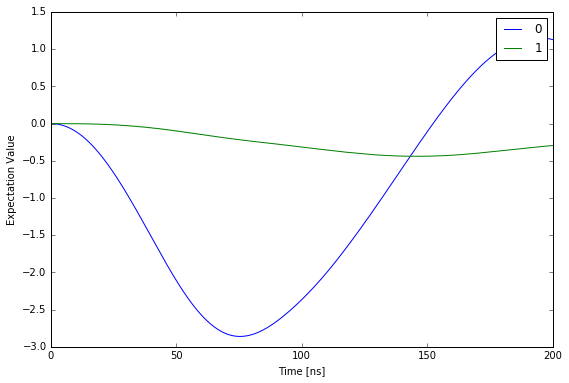

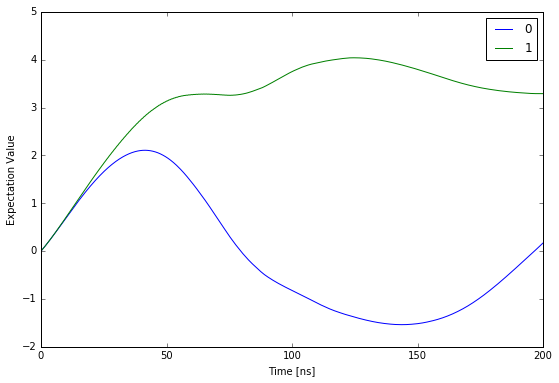

In [14]:
mmt_qutip_verification('/home/mohamed/Data/00164_JC.h5', np.dot(adag,a) )
mmt_qutip_verification('/home/mohamed/Data/00164_JC.h5', adag+a )
mmt_qutip_verification('/home/mohamed/Data/00164_JC.h5', (0+1j)* (a-adag) )

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
0.05
1001
501


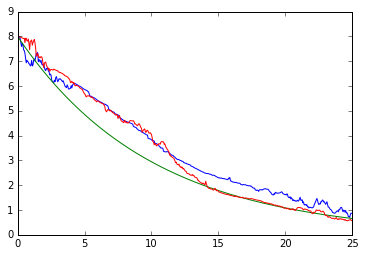

In [94]:
#damped harmonic Euler
state_num = 12
initial_vector_c=np.zeros(state_num)
initial_vector_c[8]=1

print initial_vector_c

total_time = 25
steps = 500
gamma = 0.1
dt = float(total_time)/steps

print dt

a =np.diag(np.sqrt(np.arange(1,state_num)),1)

def trajectory(psi):
    def get_D1cop(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = expect * cop - np.dot(cdag,cop) - 0.25*expect*expect
        op = op*rate*0.5
        return op

    

    def get_D2(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = cop - 0.5 *expect
        op = op*np.sqrt(rate)
        return op

    def normalize(psi):
        norm = np.dot(np.conjugate(np.transpose(psi)),psi)
        return psi/np.sqrt(norm)

    J = []
    
    expect_op = np.dot(np.conjugate(np.transpose(a)),a)
    #cdag = np.conjugate(np.transpose(expect_op))
    expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(expect_op,psi))
    J.append(expect)
    #print expect
    for step in range(steps):

        
        D1 = get_D1cop(a,psi,gamma) 
        D1psi = np.dot(D1,psi)
        D21 = get_D2(a,psi,gamma)
        
        D21psi = np.dot(D21,psi)
        
        dW1 = np.random.normal() * np.sqrt(dt)
        
        newpsi = psi + D1psi *dt + D21psi *dW1 
        #newpsi = newpsi + 0.5*(dW1*dW1 - dt)*np.dot(np.dot(D21,D21),psi) +  0.5*(dW2*dW2 - dt)*np.dot(np.dot(D22,D22),psi) 
        
        #dWe1 = np.random.normal() * np.sqrt(dt*0.5)
        #extrapsi = normalize(psi + D1psi *dt*0.5 + D21psi *dWe1)
        #D1e = get_D1cop(a,extrapsi,gamma) 
        #D1psie = np.dot(D1e,extrapsi)
        #D21e = get_D2(a,extrapsi,gamma)
        
        #D21psie = np.dot(D21e,extrapsi)
        
        #dWe2 = np.random.normal() * np.sqrt(dt*0.5)
        #extrapsi = extrapsi + D1psie *dt*0.5 + D21psi *dWe2
        
        #newpsi = 2*extrapsi - newpsi
        psi = normalize(newpsi)
        #print np.dot(np.conjugate(np.transpose(psi)),psi)
        
        #print expect
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(expect_op,psi))
        J.append(expect)

    #plot(J)
    return J

JJ = trajectory(initial_vector_c)
plot (np.linspace(0,total_time, steps+1),JJ)
plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))
#print JJ

total_time = 25
steps = 1000
dt = total_time/float(steps)
JJ2 = trajectory(initial_vector_c)
plot (np.linspace(0,total_time,steps/2 +1),JJ2[::2])
#plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))
print len(JJ2)
print len(JJ2[::2])

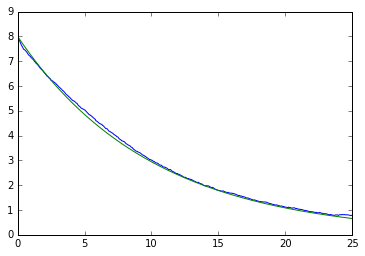

In [105]:
steps = 500
JJ = np.array(np.zeros(steps+1))

for ii in range (1000):
    
    total_time = 25
    steps = 500
    intermediate = np.array(np.zeros(steps+1))
    dt = total_time/float(steps)
    intermediate = np.array(trajectory(initial_vector_c)) +intermediate
    total_time = 25
    steps = 1000
    dt = total_time/float(steps)
    bb = np.array(trajectory(initial_vector_c)[::2])
    intermediate =  bb + bb - intermediate
    JJ = JJ + intermediate
steps = 500
plot (np.linspace(0,total_time, steps+1),JJ/1000)
plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))

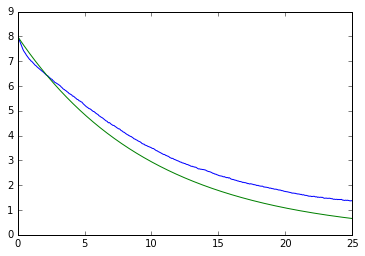

In [106]:
steps = 500
JJ = np.array(np.zeros(steps+1))

for ii in range (1000):
    
    total_time = 25
    steps = 500
    intermediate = np.array(np.zeros(steps+1))
    dt = total_time/float(steps)
    
    JJ = JJ + np.array(trajectory(initial_vector_c))
steps = 500
plot (np.linspace(0,total_time, steps+1),JJ/1000)
plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
0.05


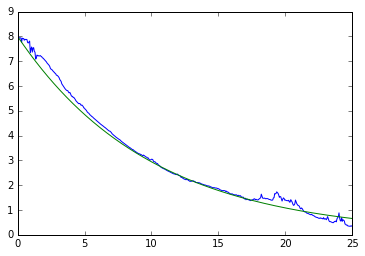

In [114]:
#damped harmonic 2nd order
state_num = 12
initial_vector_c=np.zeros(state_num)
initial_vector_c[8]=1

print initial_vector_c

total_time = 25
steps = 500
gamma = 0.1
dt = float(total_time)/steps

print dt

a =np.diag(np.sqrt(np.arange(1,state_num)),1)

def trajectory(psi):
    def get_D1cop(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = expect * cop - np.dot(cdag,cop) - 0.25*expect*expect
        op = op*rate*0.5
        return op

    

    def get_D2(cop,psi,rate):
        cdag = np.conjugate(np.transpose(cop))
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(cop + cdag,psi))
        op = cop - 0.5 *expect
        op = op*np.sqrt(rate)
        return op

    def normalize(psi):
        norm = np.dot(np.conjugate(np.transpose(psi)),psi)
        return psi/np.sqrt(norm)

    J = []
    
    expect_op = np.dot(np.conjugate(np.transpose(a)),a)
    #cdag = np.conjugate(np.transpose(expect_op))
    expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(expect_op,psi))
    J.append(expect)
    #print expect
    for step in range(steps):

         
        D1 = get_D1cop(a,psi,gamma) 
        D1psi = np.dot(D1,psi)
        D21 = get_D2(a,psi,gamma)
        
        D21psi = np.dot(D21,psi)
        
        dW1 = np.random.normal() * np.sqrt(dt)
        
        psibar = psi + D1psi *dt + D21psi *dW1 
        psiplus = psi + D1psi *dt + D21psi *np.sqrt(dt)
        psiminus = psi + D1psi *dt - D21psi *np.sqrt(dt)
        D1psibar = np.dot(get_D1cop(a,psibar,gamma),psibar)
        D2psiplus = np.dot(get_D2(a,psiplus,gamma),psiplus)
        D2psiminus = np.dot(get_D2(a,psiminus,gamma),psiminus)
        
        
        
        newpsi = psi + 0.5*dt*(D1psi+D1psibar)
        newpsi = newpsi + 0.25*dW1*(D2psiplus+D2psiminus+2*D21psi)
        newpsi = newpsi + 0.25* (1/np.sqrt(dt))*(dW1*dW1-dt)*(D2psiplus-D2psiminus)
        #newpsi = newpsi + 0.5*(dW1*dW1 - dt)*np.dot(np.dot(D21,D21),psi) +  0.5*(dW2*dW2 - dt)*np.dot(np.dot(D22,D22),psi) 
        
        
        psi = normalize(newpsi)
        #print np.dot(np.conjugate(np.transpose(psi)),psi)
        
        #print expect
        expect = np.dot(np.conjugate(np.transpose(psi)),np.dot(expect_op,psi))
        J.append(expect)

    #plot(J)
    return J

JJ = trajectory(initial_vector_c)
plot (np.linspace(0,total_time, steps+1),JJ)
plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))
#print JJ

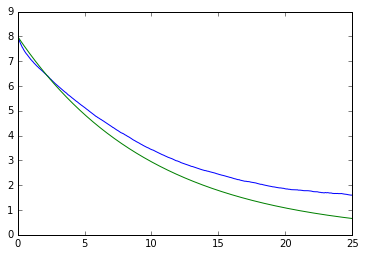

In [115]:
JJ = np.zeros(steps+1)
for ii in range (1000):
    JJ = trajectory(initial_vector_c) +JJ

plot (np.linspace(0,total_time, steps+1),JJ/1000)
plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))

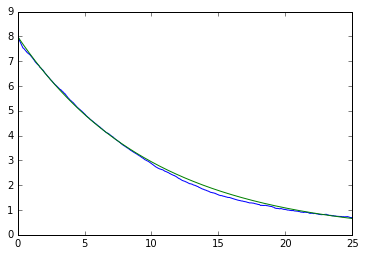

In [116]:
steps = 500
JJ = np.array(np.zeros(steps+1))

for ii in range (1000):
    
    total_time = 25
    steps = 500
    intermediate = np.array(np.zeros(steps+1))
    dt = total_time/float(steps)
    intermediate = np.array(trajectory(initial_vector_c)) +intermediate
    total_time = 25
    steps = 1000
    dt = total_time/float(steps)
    bb = np.array(trajectory(initial_vector_c)[::2])
    intermediate =  bb + bb - intermediate
    JJ = JJ + intermediate
steps = 500
plot (np.linspace(0,total_time, steps+1),JJ/1000)
plot (np.linspace(0,total_time, steps),8*exp(-gamma*np.linspace(0,total_time, steps)))